<center><h1>"Custo de consultas médicas"</h1></center>
<img src="imgs/personal.jpg"></img>

# Importando numpy, pandas, matplotlib e o  o dataset 

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

df_train = pd.read_csv('insurance.csv')

## O Dataset contém 1338 entradas e 7 colunas

In [40]:
df_train.shape

(1338, 8)

## Sendo essas colunas:
<ul>
    <li> age: Idade do paciente <code>18 .. 64</code></li>
    <li> sex: Genero <code>[male, felame]</code> </li>
    <li> bmi: IMC (Índice de massa corporal) <code>15.96 .. 53.13</code> </li>
    <li> children: Número de dependentes do paciente <code> 0 .. 5 </code> </li>
    <li> smoker: Se o paciente é ou não fumante <code>[yes, no]</code> </li>
    <li> region: Area da residência do paciente <code> [northeast, southeast, southwest, northwest]</code> </li>
    <li> charges: Preço individual faturado pelo plano de saúde <code> 1121.8739 .. 63770.42801</code> </li>
</ul>

In [22]:
df_train.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [23]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Transformando/Agrupando os dados

## Utilizando os percetis para agrupar os preços
<p> Utilizar a função <code>percentile</code> do numpy para calcular os quartis(ou os percentis 25%,50% e 75%) eu agrupei os preços em três grupos com a mesma quantidade de entradas. Sendo: </p>
<ul>
    <li> <code>0. Baixo</code> : valores menores do que <b>4740.28715</b> </li>
    <li> <code>1. Médio Baixo</code> : valores entre <b>4740.28715</b> inclusive e <b>9382.033</b> </li>
    <li> <code>2. Médio Alto</code> : valores entre <b>9382.033</b> inclusive e <b>16639.912515</b> </li>
    <li> <code>3. Alto</code> : valores maiores do que <b>16639.912515</b> inclusive </li>
</ul>

In [24]:
p1 = np.percentile(df_train['charges'],25)
p2 = np.percentile(df_train['charges'],50)
p3 = np.percentile(df_train['charges'],75)
def agrupa_preco(preco):
    if preco < p1:
        return 0
    elif preco < p2:
        return 1
    elif preco < p3:
        return 2
    else:
        return 3

df_charges = df_train['charges']
df_train['charges'] = df_train['charges'].apply(agrupa_preco)

### Baseado nos dados a seguir, esse dataset é balanceado.

Primeiro quartil:  4740.28715
Segundo quartil:  9382.033
Terceiro quartil:  16639.912515

 charges
0    335
1    334
2    334
3    335
Name: age, dtype: int64


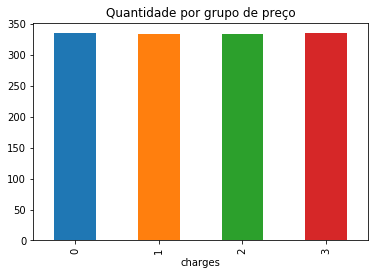

In [25]:
print ('Primeiro quartil: ',p1)
print ('Segundo quartil: ',p2)
print ('Terceiro quartil: ',p3)

print ('\n',df_train.groupby('charges').count()['age'])
df_train.groupby('charges').count()['age'].plot(kind='bar', title='Quantidade por grupo de preço')
plt.show()
df_train['charges'] = df_charges

## Agrupando as idades
<p> Os valores de idade variam entre 18 a 64 anos. Sendo assim eu decidi dividir os valores em três grupos, sendo: </p>
<ul>
    <li> <code>0. Adulto Jovem</code> : valores entre <b>18</b> inclusive e <b>30</b> </li>
    <li> <code>1. Adulto</code> : valores entre <b>30</b> inclusive e <b>50</b> </li>
    <li> <code>2. Senhor</code> : valores maiores do que <b>50</b> inclusive </li>
</ul>

In [26]:
def agrupa_idade(idade):
    if idade < 30:
        return 0
    elif idade < 50:
        return 1
    else:
        return 2

df_age = df_train['age']    
df_train['age'] = df_train['age'].apply(agrupa_idade)

age
0    417
1    536
2    385
Name: charges, dtype: int64 



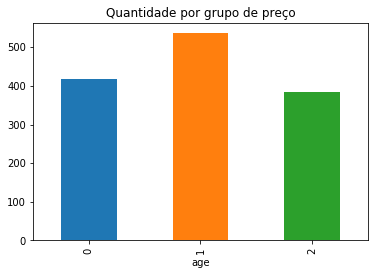

In [27]:
print (df_train.groupby('age').count()['charges'],'\n')
df_train.groupby('age').count()['charges'].plot(kind='bar', title='Quantidade por grupo de preço')
plt.show()

## Agrupando os IMCs
<p>  O IMC serve para avaliar o peso do indivíduo em relação à sua altura e assim indicar se está dentro do peso ideal, acima ou abaixo do peso desejado. Existem sete classificações para o IMC, sendo: </p>
<ul>
    <li> <code>0. Muito Abaixo do Peso</code> : valores menores do que <b>17</b> </li>
    <li> <code>1. Abaixo do Peso</code> : valores entre <b>17</b> inclusive e <b>18,5</b> </li>
    <li> <code>2. Peso Normal</code> : valores entre <b>18,5</b> inclusive e <b>25</b> </li>
    <li> <code>3. Acima do Peso</code> : valores entre <b>25</b> inclusive e <b>30</b> </li>
    <li> <code>4. Obesidade Grau 1</code> : valores entre <b>30</b> inclusive e <b>35</b> </li>
    <li> <code>5. Obesidade Grau 2</code> : valores entre <b>35</b> inclusive e <b>40</b> </li>
    <li> <code>6. Obesidade Grau 3</code> : valores maiores do que <b>40</b> inclusive </li>
</ul>

In [28]:
def agrupa_imc(imc):
    if imc < 17:
        return 0
    elif imc < 18.5:
        return 1
    elif imc < 25:
        return 2
    elif imc < 30:
        return 3
    elif imc < 35:
        return 4
    elif imc < 40:
        return 5
    else:
        return 6

df_bmi = df_train['bmi']
df_train['bmi'] = df_train['bmi'].apply(agrupa_imc)

bmi
0      3
1     17
2    225
3    386
4    391
5    225
6     91
Name: charges, dtype: int64 



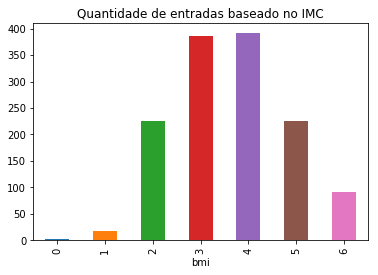

In [29]:
print (df_train.groupby('bmi').count()['charges'],'\n')
df_train.groupby('bmi').count()['charges'].plot(kind='bar', title='Quantidade de entradas baseado no IMC')
plt.show()

## Transformando os dados que já estavam agrupados em valores numéricos 

In [31]:
df_train['sex'] = df_train['sex'].apply(lambda sex: 0 if sex == 'male' else 1)
df_train['smoker'] = df_train['smoker'].apply(lambda smoker: 1 if smoker == 'yes' else 0)
df_train['region'] = df_train['region'].map({
    'northeast' : 0,
    'southeast' : 1,
    'southwest' : 2,
    'northwest' : 3
})

## Após as modificações o dataset ficou da seguinte forma:
<ul>
    <li> age: Idade do paciente <code>['0. Adulto Jovem', '1. Adulto', '2. Senhor']</code></li>
    <li> sex: Genero <code>['0. male', '1. felame']</code> </li>
    <li> bmi: IMC (Índice de massa corporal) <code>['0. Muito Abaixo do Peso', '1. Abaixo do Peso', '2. Peso Normal', '3. Acima do Peso', '4. Obesidade Grau 1', '5. Obesidade Grau 2', '6. Obesidade Grau 3']</code> </li>
    <li> children: Número de dependentes do paciente <code> [0, 1 ,2 ,3 ,4, 5] </code> </li>
    <li> smoker: Se o paciente é ou não fumante <code>['1. yes', '0. no']</code> </li>
    <li> region: Area da residência do paciente <code> ['0. northeast', '1. southeast', '2. southwest', '3. northwest']</code> </li>
    <li> charges: Preço individual faturado pelo plano de saúde <code> 1121.8739 .. 63770.42801</code> </li>
</ul>

In [32]:
print (df_train.columns.tolist())
df_train.head()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


,age,sex,bmi,children,smoker,region,charges
0,0,1,3,0,1,2,16884.92400
1,0,0,4,1,0,1,1725.55230
2,0,0,4,3,0,1,4449.46200
3,1,0,2,0,0,3,21984.47061
4,1,0,3,0,0,3,3866.85520


# Buscando informações importantes
### Gráfico de correlações

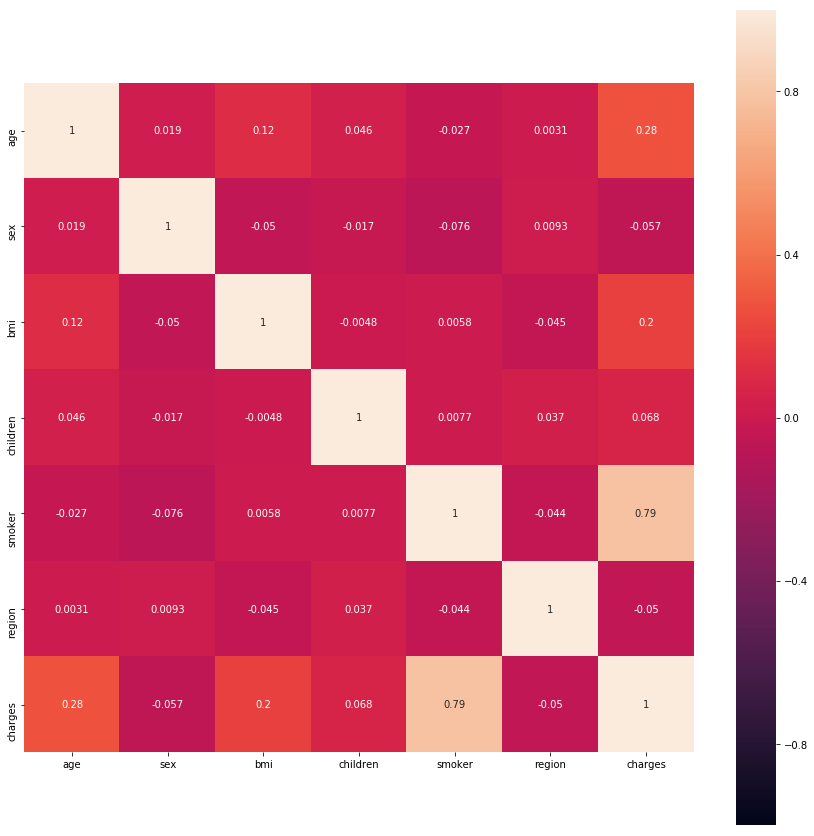

In [33]:
corr_mat = df_train.corr()

f, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(
    corr_mat, 
    annot=True, 
    square=True, 
    vmax=1, 
    vmin=-1
)

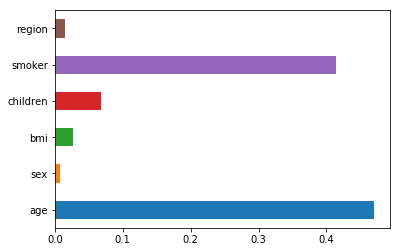

In [34]:
clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5
)

clf.fit(
    df_train.drop(['charges'], axis=1),
    df_train['charges'].apply(agrupa_preco)
)

clf.feature_importances_

feat_importances = pd.Series(
    clf.feature_importances_, 
    index=df_train.drop(['charges'], axis=1).columns
)
feat_importances.plot(kind='barh');

<h2> Baseado nos valores acima, <code>smoker</code> e <code>age</code> tem a maior influência no preço respectivamente. Abaixo temos um gráfico comparando a variação dos preços para as colunas: </h2>

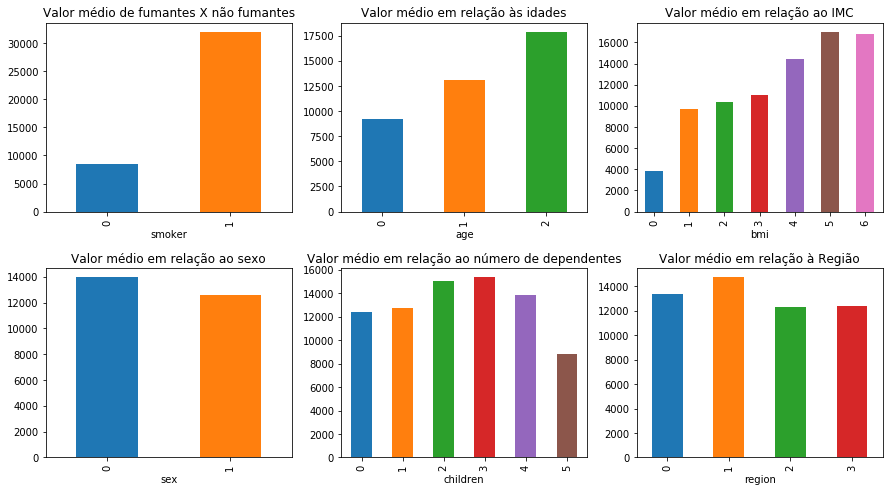

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.subplots_adjust(hspace=0.3)

df_train.groupby('smoker').mean()['charges'].plot(ax=axes[0,0],kind='bar', title='Valor médio de fumantes X não fumantes')
df_train.groupby('age').mean()['charges'].plot(ax=axes[0,1],kind='bar', title='Valor médio em relação às idades')
df_train.groupby('bmi').mean()['charges'].plot(ax=axes[0,2],kind='bar', title='Valor médio em relação ao IMC')
df_train.groupby('sex').mean()['charges'].plot(ax=axes[1,0],kind='bar', title='Valor médio em relação ao sexo')
df_train.groupby('children').mean()['charges'].plot(ax=axes[1,1],kind='bar', title='Valor médio em relação ao número de dependentes')
df_train.groupby('region').mean()['charges'].plot(ax=axes[1,2],kind='bar', title='Valor médio em relação à Região')

In [36]:
df_train = df_train.assign(sma=0)
pd.options.mode.chained_assignment = None
for i in range(0, df_train.shape[0]):
    if df_train['age'][i] == 0 and df_train['smoker'][i] == 0:
        df_train['sma'][i] = 0
    elif df_train['age'][i] == 1 and df_train['smoker'][i] == 0:
        df_train['sma'][i] = 1
    elif df_train['age'][i] == 2 and df_train['smoker'][i] == 0:
        df_train['sma'][i] = 2
    elif df_train['age'][i] == 0 and df_train['smoker'][i] == 1:
        df_train['sma'][i] = 3
    elif df_train['age'][i] == 1 and df_train['smoker'][i] == 1:
        df_train['sma'][i] = 4
    else:
        df_train['sma'][i] = 5

<h1>Por fim um gráfico de comparação dos valores médios de fumantes X não fumantes agrupados por idade</h1>

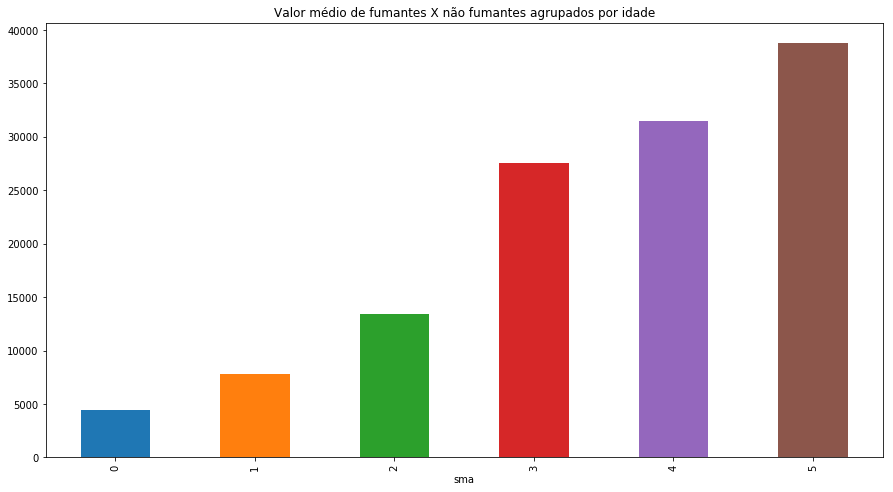

In [37]:
df_train.groupby('sma').mean()['charges'].plot(kind='bar', figsize=(15, 8),title='Valor médio de fumantes X não fumantes agrupados por idade')

<h2>Um <code>Senhor Fumante</code> paga em média 8 vezes mais do que um <code>Adulto Jovem não Fumante</code></h2>